# Informed Haar Pedestrian Detection: an earnest attempt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Step 1: Intantiate Pipeline

In [5]:
from pipeline import Pipeline

#=====[ Choose file name in which to store classifier ]=====
model = "classifier.p"

detector_pipe = Pipeline()

# Step 2: Extract Features from Images
<p> In the feature extraction process, we first generate Integral Channel Features (ICF) and then use our preformulated haar-like templates with each channel to create our feature vector. In this particular example, we will just take the top 100 most discriminative features. These were previously determined by training a classifier on our full set of 24,926 features. <p>

In [ ]:
X, Y = detector_pipe.extract_features(num_ft=100)

# Step 3: Train Classifier

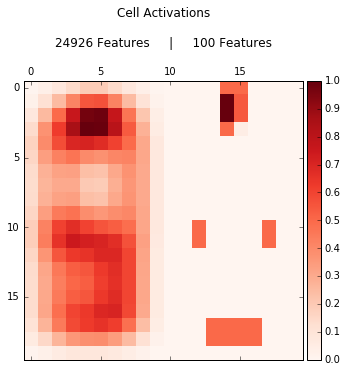

In [61]:
detector_pipe.train_classifier(X, Y, num_estimators=200, max_depth=2, save_to_file=model)

<p> Here, we're visualizing a weight map for each cell in our pedestrian model. The map on the left represents the accumulated weights from our baseline classifier. It was trained on a ~25000 dimensional feature vector derived from our Haar-like templates and each of our 11 channel features. The matrix on the right shows the activations derived from our top 100 features. As evident in our paper, these two classifiers have comparable performance given the several orders of magnitude in difference between their feature dimensionality. </p>

# Step 4: Test Classifier

In [69]:
detector_pipe.test_classifier(model)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)
-----> Testing on  2938  images
-----> Testing 1126 total images
-----> Processing Image  1
-----> Processing Image  501
-----> Processing Image  1001
-----> Processed all feature vectors
-----> Positive image accuracy:  0.938721136767
-----> Testing 1812 total images
-----> Processing Image  1
-----> Processing Image  501
-----> Processing Image  1001
-----> Processing Image  1501
-----> Processed all feature vectors
-----> Negative image accuracy:  0.974613686534
Accuracy:  0.960857726344
F1 Score:  0.948407357559


# Step 5: Run Detection

<p> We run detection on a sample image from our test set. You can change the hyperparameters below to see how it affects our results. Please see our pipeline.py class and exp_detector.py/linear_detector.py classes in the 'modules' directory for more details on these hyperparameters </p>

Processed  238  candidate bounding boxes at scaling iteration  1
Processed  66  candidate bounding boxes at scaling iteration  2
Processed  0  candidate bounding boxes at scaling iteration  3


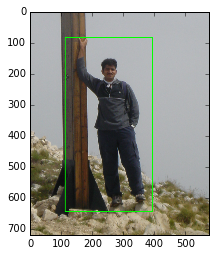

In [16]:
detector_pipe.detect(img_path='display_img/crop_000012.png', num_ft=100, scaling_factor=1.3, scaling_iters=3, nms=0.5, clf=model,linear_scaling=False)